In [56]:
import pandas as pd

In [57]:
man_df = pd.read_csv('data/caesar_fr.csv', encoding='utf-8', sep=';')
man_df=man_df.sample(frac=1)

In [58]:
caesar_male = man_df[man_df['sex'] == 1]

In [59]:
data=pd.DataFrame()

In [60]:
data=caesar_male.copy()

In [61]:
data.describe()

,taille,age,weight,sex,tour_de_cheville,longueur_du_bras,largeur_du_dos,tour_de_ventre_maximal,tour_de_poitrine,tour_de_poitrine_mesure_a_la_main,...,angle_de_l_epaule,longueur_du_côte,longueur_du_tronc,longueur_de_sous_poitrine,largeur_de_la_taille,tour_de_poignet,largeur_du_bassin,profondeur_de_poitrine,tour_d_epaule,longueur_d_avant_bras
count,2106.000000,2102.000000,2106.000000,2107.0,2107.000000,2104.000000,2052.000000,2107.0,2106.000000,0.0,...,2107.0,2107.0,2107.0,2107.0,2107.0,2107.0,2107.0,2107.0,2107.0,2107.0
mean,177.913588,37.538297,82.985266,1.0,26.720221,64.139418,41.485936,0.0,101.697680,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,8.431030,12.763015,17.167743,0.0,1.545217,3.591747,2.403755,0.0,10.616289,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,131.495800,17.500000,45.812792,1.0,22.199600,40.894000,33.147000,0.0,75.793600,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,172.212000,26.200000,70.801175,1.0,25.704800,61.798200,39.801800,0.0,94.411800,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,177.495200,37.000000,80.058988,1.0,26.593800,64.008000,41.478200,0.0,100.406200,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,183.311800,47.000000,91.398788,1.0,27.711400,66.395600,43.027600,0.0,107.670600,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,218.287600,79.000000,181.436800,1.0,36.703000,80.391000,50.165000,0.0,157.403800,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
data=data.drop_duplicates()

In [63]:
data[['tour_de_ventre_maximal','tour_de_taille']].head()

,tour_de_ventre_maximal,tour_de_taille
1510,0,127.0000
3898,0,88.0110
103,0,100.3046
2309,0,92.8878
3896,0,76.8096


In [64]:
mesure=caesar_male[['tour_de_ventre_maximal','tour_de_taille','tour_de_cuisse','largeur_des_hanches']]

In [65]:
mesure.head()

,tour_de_ventre_maximal,tour_de_taille,tour_de_cuisse,largeur_des_hanches
1510,0,127.0000,67.1068,52.5018
3898,0,88.0110,62.0014,50.5968
103,0,100.3046,64.5922,48.9966
2309,0,92.8878,57.9882,48.4124
3896,0,76.8096,51.5112,46.4058


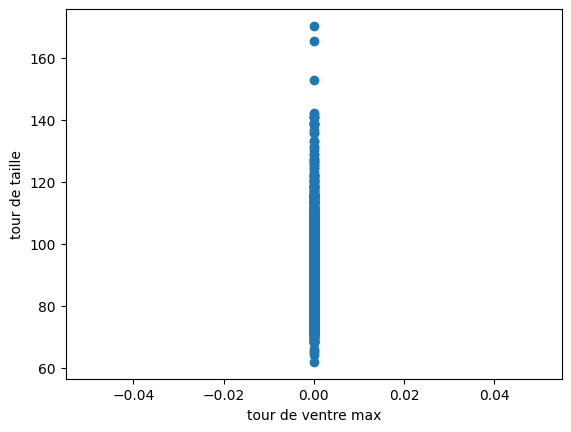

In [66]:
import matplotlib.pyplot as plt
# Plot Living area vs Sale price
plt.scatter(mesure['tour_de_ventre_maximal'], mesure['tour_de_taille'])
# Labels
plt.xlabel("tour de ventre max")
plt.ylabel("tour de taille")
plt.show()

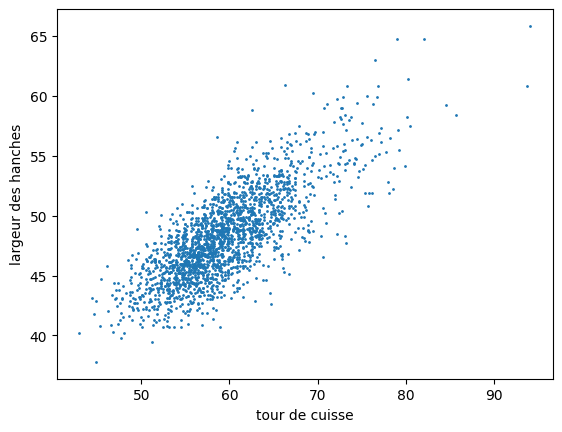

In [67]:
import matplotlib.pyplot as plt
# Plot Living area vs Sale price
plt.scatter(mesure['tour_de_cuisse'], mesure['largeur_des_hanches'],s=1)
# Labels
plt.xlabel("tour de cuisse")
plt.ylabel("largeur des hanches")
plt.show()

In [68]:
import pandas as pd

def classifier_morphologie(row):
    # Extraction des mesures
    tour_ventre = row['tour_de_ventre_maximal']
    tour_taille = row['tour_de_taille']
    tour_poitrine = row['tour_de_poitrine']
    tour_cuisse = row['tour_de_cuisse']
    largeur_hanches = row['largeur_des_hanches']
    
    # --- Catégorie VENTRE (basée sur le ratio ventre/taille) ---
    if tour_taille < 75:
        ventre = "plat"
    elif tour_taille < 90:
        ventre = "moyen"
    else:
        ventre = "rond"
    
    # --- Catégorie TORSE (basée sur le tour de poitrine seul ou comparé à la taille) ---
    if tour_poitrine < 85:
        torse = "fin"
    elif tour_poitrine < 100:
        torse = "moyen"
    else:
        torse = "large"
    
    # --- Catégorie CUISSES (ratio cuisse / hanches) ---
    ratio_cuisse = tour_cuisse / largeur_hanches
    if ratio_cuisse < 0.55:
        cuisses = "fines"
    elif ratio_cuisse < 0.65:
        cuisses = "moyennes"
    else:
        cuisses = "larges"
    
    return pd.Series([ventre, torse, cuisses], 
                     index=['categorie_ventre', 'categorie_torse', 'categorie_cuisses'])
    
# Remplace `df` par le nom de ton DataFrame
data[['categorie_ventre', 'categorie_torse', 'categorie_cuisses']] = data.apply(classifier_morphologie, axis=1)

In [69]:
data.head()

,taille,age,weight,sex,tour_de_cheville,longueur_du_bras,largeur_du_dos,tour_de_ventre_maximal,tour_de_poitrine,tour_de_poitrine_mesure_a_la_main,...,longueur_de_sous_poitrine,largeur_de_la_taille,tour_de_poignet,largeur_du_bassin,profondeur_de_poitrine,tour_d_epaule,longueur_d_avant_bras,categorie_ventre,categorie_torse,categorie_cuisses
1510,189.7126,51.0,136.000489,1.0,31.4960,68.3006,47.5488,0,132.7912,NaN,...,0,0,0,0,0,0,0,rond,large,larges
3898,178.9938,29.1,80.698553,1.0,26.0096,65.3034,39.9034,0,97.4090,NaN,...,0,0,0,0,0,0,0,moyen,moyen,larges
103,181.9910,36.0,93.199548,1.0,27.4066,59.9948,NaN,0,105.1052,NaN,...,0,0,0,0,0,0,0,rond,large,larges
2309,182.9054,62.0,90.491604,1.0,28.1940,66.1924,43.0530,0,109.4994,NaN,...,0,0,0,0,0,0,0,rond,large,larges
3896,176.5046,26.9,64.500782,1.0,26.6954,64.9986,43.0784,0,91.4908,NaN,...,0,0,0,0,0,0,0,moyen,moyen,larges


In [70]:
data=data.loc[:, (data != 0).any()]

In [71]:
data.head()

,taille,age,weight,sex,tour_de_cheville,longueur_du_bras,largeur_du_dos,tour_de_poitrine,tour_de_poitrine_mesure_a_la_main,hauteur_de_poitrine,...,largeur_d_epaule,hauteur_des_epaules,largeur_des_epaules_a_l_horizontales,longueur_de_la_colonne_vertebrale_jusqu_au_poignet,tour_de_cuisse,tour_de_taille,hauteur_de_la_taille,categorie_ventre,categorie_torse,categorie_cuisses
1510,189.7126,51.0,136.000489,1.0,31.4960,68.3006,47.5488,132.7912,NaN,136.9060,...,47.5488,154.1145,52.5018,91.5924,67.1068,127.0000,109.4994,rond,large,larges
3898,178.9938,29.1,80.698553,1.0,26.0096,65.3034,39.9034,97.4090,NaN,124.6124,...,39.9034,145.9992,50.5968,83.4898,62.0014,88.0110,102.7938,moyen,moyen,larges
103,181.9910,36.0,93.199548,1.0,27.4066,59.9948,NaN,105.1052,NaN,NaN,...,NaN,NaN,48.9966,84.5058,64.5922,100.3046,104.9020,rond,large,larges
2309,182.9054,62.0,90.491604,1.0,28.1940,66.1924,43.0530,109.4994,NaN,129.5908,...,43.0530,150.7998,48.4124,88.3920,57.9882,92.8878,103.9876,rond,large,larges
3896,176.5046,26.9,64.500782,1.0,26.6954,64.9986,43.0784,91.4908,NaN,125.7046,...,43.0784,142.0114,46.4058,88.1888,51.5112,76.8096,102.5906,moyen,moyen,larges


In [72]:
data = data.dropna(how='all', axis=1)

In [73]:
data.head()

,taille,age,weight,sex,tour_de_cheville,longueur_du_bras,largeur_du_dos,tour_de_poitrine,hauteur_de_poitrine,hauteur_d_entrejambe,...,largeur_d_epaule,hauteur_des_epaules,largeur_des_epaules_a_l_horizontales,longueur_de_la_colonne_vertebrale_jusqu_au_poignet,tour_de_cuisse,tour_de_taille,hauteur_de_la_taille,categorie_ventre,categorie_torse,categorie_cuisses
1510,189.7126,51.0,136.000489,1.0,31.4960,68.3006,47.5488,132.7912,136.9060,86.2076,...,47.5488,154.1145,52.5018,91.5924,67.1068,127.0000,109.4994,rond,large,larges
3898,178.9938,29.1,80.698553,1.0,26.0096,65.3034,39.9034,97.4090,124.6124,80.0100,...,39.9034,145.9992,50.5968,83.4898,62.0014,88.0110,102.7938,moyen,moyen,larges
103,181.9910,36.0,93.199548,1.0,27.4066,59.9948,NaN,105.1052,NaN,82.8040,...,NaN,NaN,48.9966,84.5058,64.5922,100.3046,104.9020,rond,large,larges
2309,182.9054,62.0,90.491604,1.0,28.1940,66.1924,43.0530,109.4994,129.5908,83.0072,...,43.0530,150.7998,48.4124,88.3920,57.9882,92.8878,103.9876,rond,large,larges
3896,176.5046,26.9,64.500782,1.0,26.6954,64.9986,43.0784,91.4908,125.7046,82.0928,...,43.0784,142.0114,46.4058,88.1888,51.5112,76.8096,102.5906,moyen,moyen,larges


In [81]:
import pandas as pd
import numpy as np

def remplacer_nan_par_moyenne(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            moyenne = df[col].mean(skipna=True)
            df[col] = df[col].fillna(moyenne)
    return df

data = remplacer_nan_par_moyenne(data)
data.head()

,taille,age,weight,sex,tour_de_cheville,longueur_du_bras,largeur_du_dos,tour_de_poitrine,hauteur_de_poitrine,hauteur_d_entrejambe,...,largeur_d_epaule,hauteur_des_epaules,largeur_des_epaules_a_l_horizontales,longueur_de_la_colonne_vertebrale_jusqu_au_poignet,tour_de_cuisse,tour_de_taille,hauteur_de_la_taille,categorie_ventre,categorie_torse,categorie_cuisses
1510,189.7126,51.0,136.000489,1.0,31.4960,68.3006,47.548800,132.7912,136.906000,86.2076,...,47.548800,154.11450,52.5018,91.5924,67.1068,127.0000,109.4994,rond,large,larges
3898,178.9938,29.1,80.698553,1.0,26.0096,65.3034,39.903400,97.4090,124.612400,80.0100,...,39.903400,145.99920,50.5968,83.4898,62.0014,88.0110,102.7938,moyen,moyen,larges
103,181.9910,36.0,93.199548,1.0,27.4066,59.9948,41.485936,105.1052,128.796549,82.8040,...,41.485936,145.86253,48.9966,84.5058,64.5922,100.3046,104.9020,rond,large,larges
2309,182.9054,62.0,90.491604,1.0,28.1940,66.1924,43.053000,109.4994,129.590800,83.0072,...,43.053000,150.79980,48.4124,88.3920,57.9882,92.8878,103.9876,rond,large,larges
3896,176.5046,26.9,64.500782,1.0,26.6954,64.9986,43.078400,91.4908,125.704600,82.0928,...,43.078400,142.01140,46.4058,88.1888,51.5112,76.8096,102.5906,moyen,moyen,larges


In [82]:
from sklearn.preprocessing import OneHotEncoder

# Colonnes à encoder
colonnes_cat = ['categorie_ventre', 'categorie_torse', 'categorie_cuisses']

# Afficher les valeurs uniques pour vérification
for col in colonnes_cat:
    print(f"Valeurs uniques pour '{col}' :", data[col].unique())

# Instancier OneHotEncoder avec drop='if_binary' (garde 1 seule colonne pour les colonnes binaires)
ohe = OneHotEncoder(sparse_output=False, drop='if_binary')

# Fit + transform sur les colonnes sélectionnées
encoded_array = ohe.fit_transform(data[colonnes_cat])

# Obtenir les noms des nouvelles colonnes générées
encoded_col_names = ohe.get_feature_names_out(colonnes_cat)

# Créer un DataFrame avec les colonnes encodées
df_encoded = pd.DataFrame(encoded_array, columns=encoded_col_names, index=data.index)

# Fusionner avec le DataFrame d’origine
mesure_sc = pd.concat([data.drop(columns=colonnes_cat), df_encoded], axis=1)

# Aperçu du DataFrame final
mesure_sc.head()


Valeurs uniques pour 'categorie_ventre' : ['rond' 'moyen' 'plat']
Valeurs uniques pour 'categorie_torse' : ['large' 'moyen' 'fin']
Valeurs uniques pour 'categorie_cuisses' : ['larges']


,taille,age,weight,sex,tour_de_cheville,longueur_du_bras,largeur_du_dos,tour_de_poitrine,hauteur_de_poitrine,hauteur_d_entrejambe,...,tour_de_cuisse,tour_de_taille,hauteur_de_la_taille,categorie_ventre_moyen,categorie_ventre_plat,categorie_ventre_rond,categorie_torse_fin,categorie_torse_large,categorie_torse_moyen,categorie_cuisses_larges
1510,189.7126,51.0,136.000489,1.0,31.4960,68.3006,47.548800,132.7912,136.906000,86.2076,...,67.1068,127.0000,109.4994,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3898,178.9938,29.1,80.698553,1.0,26.0096,65.3034,39.903400,97.4090,124.612400,80.0100,...,62.0014,88.0110,102.7938,1.0,0.0,0.0,0.0,0.0,1.0,1.0
103,181.9910,36.0,93.199548,1.0,27.4066,59.9948,41.485936,105.1052,128.796549,82.8040,...,64.5922,100.3046,104.9020,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2309,182.9054,62.0,90.491604,1.0,28.1940,66.1924,43.053000,109.4994,129.590800,83.0072,...,57.9882,92.8878,103.9876,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3896,176.5046,26.9,64.500782,1.0,26.6954,64.9986,43.078400,91.4908,125.704600,82.0928,...,51.5112,76.8096,102.5906,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [83]:
from sklearn.preprocessing import RobustScaler

# 🟡 Colonnes à exclure du scaling
colonnes_a_exclure = [
    'longueur_du_bras', 'longueur_bras_binaire', 
    'categorie_ventre', 'categorie_torse', 'categorie_cuisses',
    'categorie_ventre_rond', 'categorie_torse_fin', 
    'categorie_torse_large', 'categorie_torse_moyen', 
    'categorie_cuisses_larges'
]

# 🟢 Colonnes à scaler (toutes les autres)
colonnes_a_scaler = [col for col in mesure_sc.columns if col not in colonnes_a_exclure]

# ⚙️ Instanciation et application du RobustScaler
scaler = RobustScaler()
df_scaled = mesure_sc.copy()
df_scaled[colonnes_a_scaler] = scaler.fit_transform(df_scaled[colonnes_a_scaler])
df_scaled.head()

,taille,age,weight,sex,tour_de_cheville,longueur_du_bras,largeur_du_dos,tour_de_poitrine,hauteur_de_poitrine,hauteur_d_entrejambe,...,tour_de_cuisse,tour_de_taille,hauteur_de_la_taille,categorie_ventre_moyen,categorie_ventre_plat,categorie_ventre_rond,categorie_torse_fin,categorie_torse_large,categorie_torse_moyen,categorie_cuisses_larges
1510,1.100686,0.673077,2.715922,0.0,2.443038,68.3006,1.940613,2.447217,0.945985,0.710884,...,1.199275,2.857143,0.706840,-1.0,0.0,1.0,0.0,1.0,0.0,1.0
3898,0.135011,-0.379808,0.031050,0.0,-0.291139,65.3034,-0.506541,-0.226488,-0.467153,-0.119048,...,0.471014,-0.028195,-0.153094,0.0,0.0,0.0,0.0,0.0,1.0,1.0
103,0.405034,-0.048077,0.637965,0.0,0.405063,59.9948,0.000000,0.355086,0.013811,0.255102,...,0.840580,0.881579,0.117264,-1.0,0.0,1.0,0.0,1.0,0.0,1.0
2309,0.487414,1.201923,0.506496,0.0,0.797468,66.1924,0.501589,0.687140,0.105109,0.282313,...,-0.101449,0.332707,0.000000,-1.0,0.0,1.0,0.0,1.0,0.0,1.0
3896,-0.089245,-0.485577,-0.755340,0.0,0.050633,64.9986,0.509719,-0.673704,-0.341606,0.159864,...,-1.025362,-0.857143,-0.179153,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

def entrainer_regression_par_colonne(df, colonnes_explicatives, colonnes_cibles):
    """
    Entraîne une régression linéaire pour chaque colonne cible dans colonnes_cibles
    en utilisant les colonnes_explicatives comme variables d'entrée.

    Args:
        df (pd.DataFrame): Le DataFrame contenant les données.
        colonnes_explicatives (list): Liste des noms de colonnes à utiliser comme X.
        colonnes_cibles (list): Liste des noms de colonnes à prédire.

    Returns:
        dict: dictionnaire contenant pour chaque cible, son modèle entraîné et le score R².
    """
    resultats = {}

    for cible in colonnes_cibles:
        X = df[colonnes_explicatives]
        y = df[cible]

        model = LinearRegression()
        model.fit(X, y)
        score = model.score(X, y)

        resultats[cible] = {
            'modele': model,
            'score': score
        }

        print(f"✅ Modèle entraîné pour {cible} — Score R² : {score:.4f}")

    return resultats

# Exemple d’utilisation :
colonnes_X = ['taille', 'age', 'weight',
              'categorie_ventre_plat', 'categorie_ventre_moyen', 'categorie_ventre_rond',
              'categorie_torse_fin', 'categorie_torse_moyen', 'categorie_torse_large',
              'categorie_cuisses_fines', 'categorie_cuisses_moyennes', 'categorie_cuisses_larges']

colonnes_X_valides = [col for col in colonnes_X if col in df_scaled.columns]


# Par exemple, toutes les colonnes sauf colonnes_X sont cibles
colonnes_y = [col for col in df_scaled.columns if col not in colonnes_X]

imputer = SimpleImputer(strategy='median')  # ou strategy='mean'
df_imputed = pd.DataFrame(imputer.fit_transform(df_scaled), columns=df_scaled.columns)


resultats = entrainer_regression_par_colonne(df_imputed, colonnes_X_valides, colonnes_y)


✅ Modèle entraîné pour sex — Score R² : 1.0000
✅ Modèle entraîné pour tour_de_cheville — Score R² : 0.5767
✅ Modèle entraîné pour longueur_du_bras — Score R² : 0.6075
✅ Modèle entraîné pour largeur_du_dos — Score R² : 0.4207
✅ Modèle entraîné pour tour_de_poitrine — Score R² : 0.9165
✅ Modèle entraîné pour hauteur_de_poitrine — Score R² : 0.8919
✅ Modèle entraîné pour hauteur_d_entrejambe — Score R² : 0.8111
✅ Modèle entraîné pour longueur_avant — Score R² : 0.5121
✅ Modèle entraîné pour largeur_des_hanches — Score R² : 0.6911
✅ Modèle entraîné pour hauteur_des_hanches — Score R² : 0.6974
✅ Modèle entraîné pour hauteur_des_genoux — Score R² : 0.7951
✅ Modèle entraîné pour tour_du_cou — Score R² : 0.4807
✅ Modèle entraîné pour largeur_d_epaule — Score R² : 0.4207
✅ Modèle entraîné pour hauteur_des_epaules — Score R² : 0.9094
✅ Modèle entraîné pour largeur_des_epaules_a_l_horizontales — Score R² : 0.6911
✅ Modèle entraîné pour longueur_de_la_colonne_vertebrale_jusqu_au_poignet — Score R²

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
import pandas as pd

def entrainer_regression_par_colonne(df, colonnes_explicatives, colonnes_cibles, test_size=0.2, random_state=42):
    """
    Entraîne une régression linéaire pour chaque colonne cible, avec train_test_split.

    Args:
        df (pd.DataFrame): Le DataFrame complet.
        colonnes_explicatives (list): Noms des colonnes à utiliser comme variables d'entrée (X).
        colonnes_cibles (list): Noms des colonnes à prédire (y).
        test_size (float): Proportion du jeu de test (entre 0 et 1).
        random_state (int): Graine pour la reproductibilité.

    Returns:
        dict: Pour chaque colonne cible, le modèle, score R² (train & test).
    """
    resultats = {}

    # 1. Imputer les NaN
    imputer = SimpleImputer(strategy='median')
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    for cible in colonnes_cibles:
        X = df_imputed[colonnes_explicatives]
        y = df_imputed[cible]

        # 2. Split des données
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )

        # 3. Entraînement
        model = LinearRegression()
        model.fit(X_train, y_train)

        # 4. Évaluation
        score_train = model.score(X_train, y_train)
        score_test = model.score(X_test, y_test)

        resultats[cible] = {
            'modele': model,
            'score_train': score_train,
            'score_test': score_test
        }

        print(f"✅ {cible} — R² train: {score_train:.4f} | test: {score_test:.4f}")

    return resultats
    
colonnes_X = ['taille', 'age', 'weight',
              'categorie_ventre_plat', 'categorie_ventre_moyen', 'categorie_ventre_rond',
              'categorie_torse_fin', 'categorie_torse_moyen', 'categorie_torse_large',
              'categorie_cuisses_fines', 'categorie_cuisses_moyennes', 'categorie_cuisses_larges']

colonnes_X_valides = [col for col in colonnes_X if col in df_scaled.columns]


# Par exemple, toutes les colonnes sauf colonnes_X sont cibles
colonnes_y = [col for col in df_scaled.columns if col not in colonnes_X]

resultats = entrainer_regression_par_colonne(df_scaled, colonnes_X_valides, colonnes_y)

✅ sex — R² train: 1.0000 | test: 1.0000
✅ tour_de_cheville — R² train: 0.5717 | test: 0.5883
✅ longueur_du_bras — R² train: 0.6096 | test: 0.5948
✅ largeur_du_dos — R² train: 0.4270 | test: 0.3905
✅ tour_de_poitrine — R² train: 0.9172 | test: 0.9119
✅ hauteur_de_poitrine — R² train: 0.8990 | test: 0.8639
✅ hauteur_d_entrejambe — R² train: 0.8080 | test: 0.8225
✅ longueur_avant — R² train: 0.5186 | test: 0.4796
✅ largeur_des_hanches — R² train: 0.6935 | test: 0.6758
✅ hauteur_des_hanches — R² train: 0.6832 | test: 0.7493
✅ hauteur_des_genoux — R² train: 0.7998 | test: 0.7756
✅ tour_du_cou — R² train: 0.4908 | test: 0.4251
✅ largeur_d_epaule — R² train: 0.4270 | test: 0.3905
✅ hauteur_des_epaules — R² train: 0.9174 | test: 0.8767
✅ largeur_des_epaules_a_l_horizontales — R² train: 0.6935 | test: 0.6758
✅ longueur_de_la_colonne_vertebrale_jusqu_au_poignet — R² train: 0.6911 | test: 0.6348
✅ tour_de_cuisse — R² train: 0.8241 | test: 0.8421
✅ tour_de_taille — R² train: 0.8870 | test: 0.8965


In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

def entrainer_regression_cv(df, colonnes_explicatives, colonnes_cibles, n_splits=5, random_state=42):
    """
    Entraîne une régression linéaire pour chaque colonne cible avec K-Fold Cross Validation.

    Args:
        df (pd.DataFrame): Le DataFrame complet.
        colonnes_explicatives (list): Noms des colonnes explicatives.
        colonnes_cibles (list): Noms des colonnes cibles.
        n_splits (int): Nombre de folds pour la validation croisée.
        random_state (int): Graine pour la reproductibilité.

    Returns:
        dict: Pour chaque cible, moyenne et écart-type du score R² sur les folds.
    """
    resultats = {}

    # 1. Imputation des NaN
    imputer = SimpleImputer(strategy='median')
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    # 2. Configuration du K-Fold
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    for cible in colonnes_cibles:
        X = df_imputed[colonnes_explicatives]
        y = df_imputed[cible]

        modele = LinearRegression()

        # 3. Cross-validation sur R²
        scores = cross_val_score(modele, X, y, cv=kf, scoring='r2')

        resultats[cible] = {
            'r2_moyen': np.mean(scores),
            'r2_ecart_type': np.std(scores),
            'r2_scores': scores
        }

        print(f"✅ {cible} — R² moyen: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

    return resultats
colonnes_X = ['taille', 'age', 'weight',
              'categorie_ventre_plat', 'categorie_ventre_moyen', 'categorie_ventre_rond',
              'categorie_torse_fin', 'categorie_torse_moyen', 'categorie_torse_large',
              'categorie_cuisses_fines', 'categorie_cuisses_moyennes', 'categorie_cuisses_larges']

colonnes_X_valides = [col for col in colonnes_X if col in df_scaled.columns]
colonnes_y = [col for col in df_scaled.columns if col not in colonnes_X_valides]

resultats_cv = entrainer_regression_cv(df_scaled, colonnes_X_valides, colonnes_y, n_splits=5)


✅ sex — R² moyen: 1.0000 ± 0.0000
✅ tour_de_cheville — R² moyen: 0.5694 ± 0.0214
✅ longueur_du_bras — R² moyen: 0.6041 ± 0.0170
✅ largeur_du_dos — R² moyen: 0.4151 ± 0.0342
✅ tour_de_poitrine — R² moyen: 0.9149 ± 0.0086
✅ hauteur_de_poitrine — R² moyen: 0.8915 ± 0.0156
✅ hauteur_d_entrejambe — R² moyen: 0.8098 ± 0.0141
✅ longueur_avant — R² moyen: 0.5074 ± 0.0221
✅ largeur_des_hanches — R² moyen: 0.6885 ± 0.0124
✅ hauteur_des_hanches — R² moyen: 0.6942 ± 0.0321
✅ hauteur_des_genoux — R² moyen: 0.7936 ± 0.0121
✅ tour_du_cou — R² moyen: 0.4718 ± 0.0339
✅ largeur_d_epaule — R² moyen: 0.4151 ± 0.0342
✅ hauteur_des_epaules — R² moyen: 0.9085 ± 0.0175
✅ largeur_des_epaules_a_l_horizontales — R² moyen: 0.6885 ± 0.0124
✅ longueur_de_la_colonne_vertebrale_jusqu_au_poignet — R² moyen: 0.6766 ± 0.0247
✅ tour_de_cuisse — R² moyen: 0.8263 ± 0.0091
✅ tour_de_taille — R² moyen: 0.8859 ± 0.0166
✅ hauteur_de_la_taille — R² moyen: 0.7963 ± 0.0159
